#Abstract

El dataset seleccionado para este trabajo corresponde a los datos de una aseguradora sobre los reclamos de accidentes automovilísticos registrados en el período de 3 años incluyendo una distinción sobre aquellos que fueron detectados como fraudulentos.

Audiencia: Esta destinado al departamento de análisis de la compañía aseguradora para luego de ser estudiado ser compartido con el equipos operativo y comercial. El mismo incluye la siguiente información que ayudará a entender las características y correlaciones de los casos fraudulentos para así detectar y también prevenir.


*   Detalles sobre el asegurado (Age/Edad, MaritalStatuts/Estado Civil, Sex/Genero, DriverRating/Puntaje del Conductor)
*   Detalles sobre el autómovil (AgeOfVehicle/Antiguedad del autómovil, VehicleCategory/Categoria del autómovil, VehiclePrice/Precio del autómovil, Make/Marca)
*   Detalles de la póliza que tenia el cliente (PolicyType/Tipo de Póliza)
*   Detalles del accidente (Day/Día del accidente, Week/Semana del año del accidente, Year/Año, AccidentArea/Zona del accidente, FraudFound_P/si hubo fraude, Witness/Si hubo testigos, NumberofCars/Autos involucrados, AgentType/Si el fraude fue de alguien interno de la empresa o externo, PoliceReportFilled/si fue denunciado a la policia, PastNumberOfClaims/Si tuvo reclamos anteriores, Fault/quien fue el culpable del accidente).


## Problema comercial y Objetivo


* Problema comercial: La no detección de reclamos fraudulentos genera a la compañía pérdidas financieras y si no se trabaja en el análisis de los mismos puede llegar a afectar la rentabilidad del negocio. Es por eso que se procede a hacer este estudio.  

* Objetivo : Analizar las caracteristicas de los siniestros y corelaciones entre las mismas para lograr detectar los casos fraudulentos que puedan presentarse ante la aseguradora a fin de rechazarlos y evitar perdidas comerciales por pagos que no corresponderían.

## Preguntas e Hipótesis de interes

* ¿Cuál es la proporcion de casos fraudulentos vs no fraudulentos? 

* ¿Hay alguna relación entre la edad del asegurado, la cantidad de accidentes y la probabilidad de presentar reclamos fraudulentos? Hipótesis: Es más probable que los asegurados jóvenes presenten reclamos fraudulentos.

* ¿Existen patrones estacionales en la presentación de reclamos? Hipótesis: Es más probable que se presenten reclamos en los meses de invierno debido a las condiciones climáticas adversas.

* ¿El valor del vehículo asegurado influye en la probabilidad de presentar reclamos fraudulentos? Hipótesis: Es más probable que los vehículos de menor valor presenten reclamos fraudulentos en comparación con los vehículos mas caros.

* ¿Hay alguna relación entre el género y estado marital del asegurado y la probabilidad de presentar reclamos fraudulentos? Hipótesis: No hay una correlación significativa entre el género del asegurado y la probabilidad de presentar reclamos fraudulentos.


## Contexto Analitico

Se proporciona un archivo .csv estructurado en 33 columnas y  15100 filas. Como mencionado en el abstract, los campos incluidos en el dataset son todos los referidos a las características del asegurado, del siniestro, del reclamo, del automóvil y de la póliza para los casos de un período de tres años. 
Con estos datos se realizaran las siguientes tareas:
* Leer, analizar y transformar los datos.
* Determinar variables principales a comparar
* Generar visualizaciones buscando responder a las preguntas, hipótesis y generar insights.

# Importacion de Librerias y Datastet

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [180]:
sns.set_style("whitegrid")

In [181]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [182]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Desafios'
df_insurance = pd.read_csv('Insurance.csv',sep=',')

/content/gdrive/MyDrive/Colab Notebooks/Desafios


#EDA

In [183]:
df_insurance.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [184]:
# policy number es lo mismo que el index, es un dato redundante, eliminamos la columna. rep number no aporta informacion relevante, tambien se eliminara. ademas poli
df_insurance = df_insurance.drop(columns=['PolicyNumber', 'RepNumber'])

#PolicyType es la concatenacion de Basepolicy y VehicleType, por eso sera eliminada
df_insurance = df_insurance.drop(columns='PolicyType')

## Nulos

In [185]:
#reviso si hay valores incorrectos, aunque no haya nulos, puede haber Ceros.Para eso, solicitamos los valores unicos de cada columna 
for column in df_insurance:
    print(column)
    print(sorted(df_insurance[column].unique()),"\n")

# en age esta el valor 0, hay que revisar a que corresponde y definir que estrategia de reemplazo o eliminacion tomar.

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

In [186]:
#primero vemos que cantidad de 0s hay
len(df_insurance.loc[df_insurance.Age == 0])

320

In [187]:
#No son muchos respecto al dataset completo, por ende procederemos a eliminarlos
df_insurance = df_insurance.drop(index=df_insurance[df_insurance['Age'] == 0].index)

In [188]:
# volvemos a revisar, ya no hay ceros
for column in df_insurance:
    print(column)
    print(sorted(df_insurance[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75

## Duplicados

In [189]:
duplicates = df_insurance.duplicated()

# Contar el número de filas duplicadas
num_duplicates = duplicates.sum()

# Mostrar el resultado
if num_duplicates > 0:
    print(f"Hay {num_duplicates} filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")

No hay filas duplicadas en el DataFrame.


## Outliers y desbalances

<Axes: ylabel='Age'>

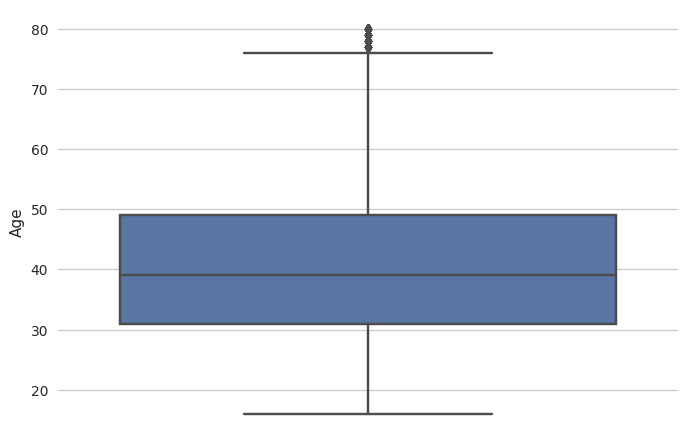

In [190]:
## chequeo distribucion y si hay otliers en la edad. si bien marca algunos outliers entre los 70 y 80 años, 
## en el grafico de distribucion debajo se ve que es homogeneo, tiene logica que haya menos gente mayor considerando que hablamos de conductores. 

sns.boxplot(y = 'Age', data = df_insurance)

<Axes: xlabel='Age', ylabel='Count'>

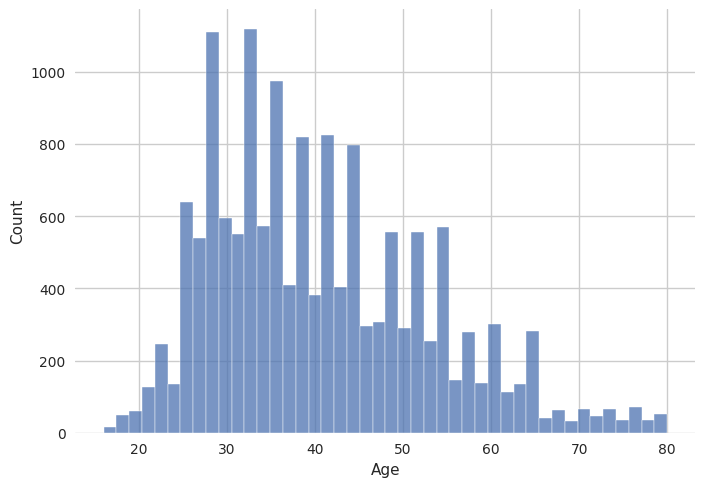

In [191]:
sns.histplot(df_insurance.Age)

In [192]:
# Para facilitar los siguientes analisis procedo a dividir las variables

variables_numericas = df_insurance[['Age', 'WeekOfMonth', 'Deductible','DriverRating','Year', 'WeekOfMonthClaimed']]
variables_categoricas=df_insurance.drop(['Age','Deductible','DriverRating','FraudFound_P','Year','WeekOfMonthClaimed','WeekOfMonth'],axis=1)
target=df_insurance['FraudFound_P']

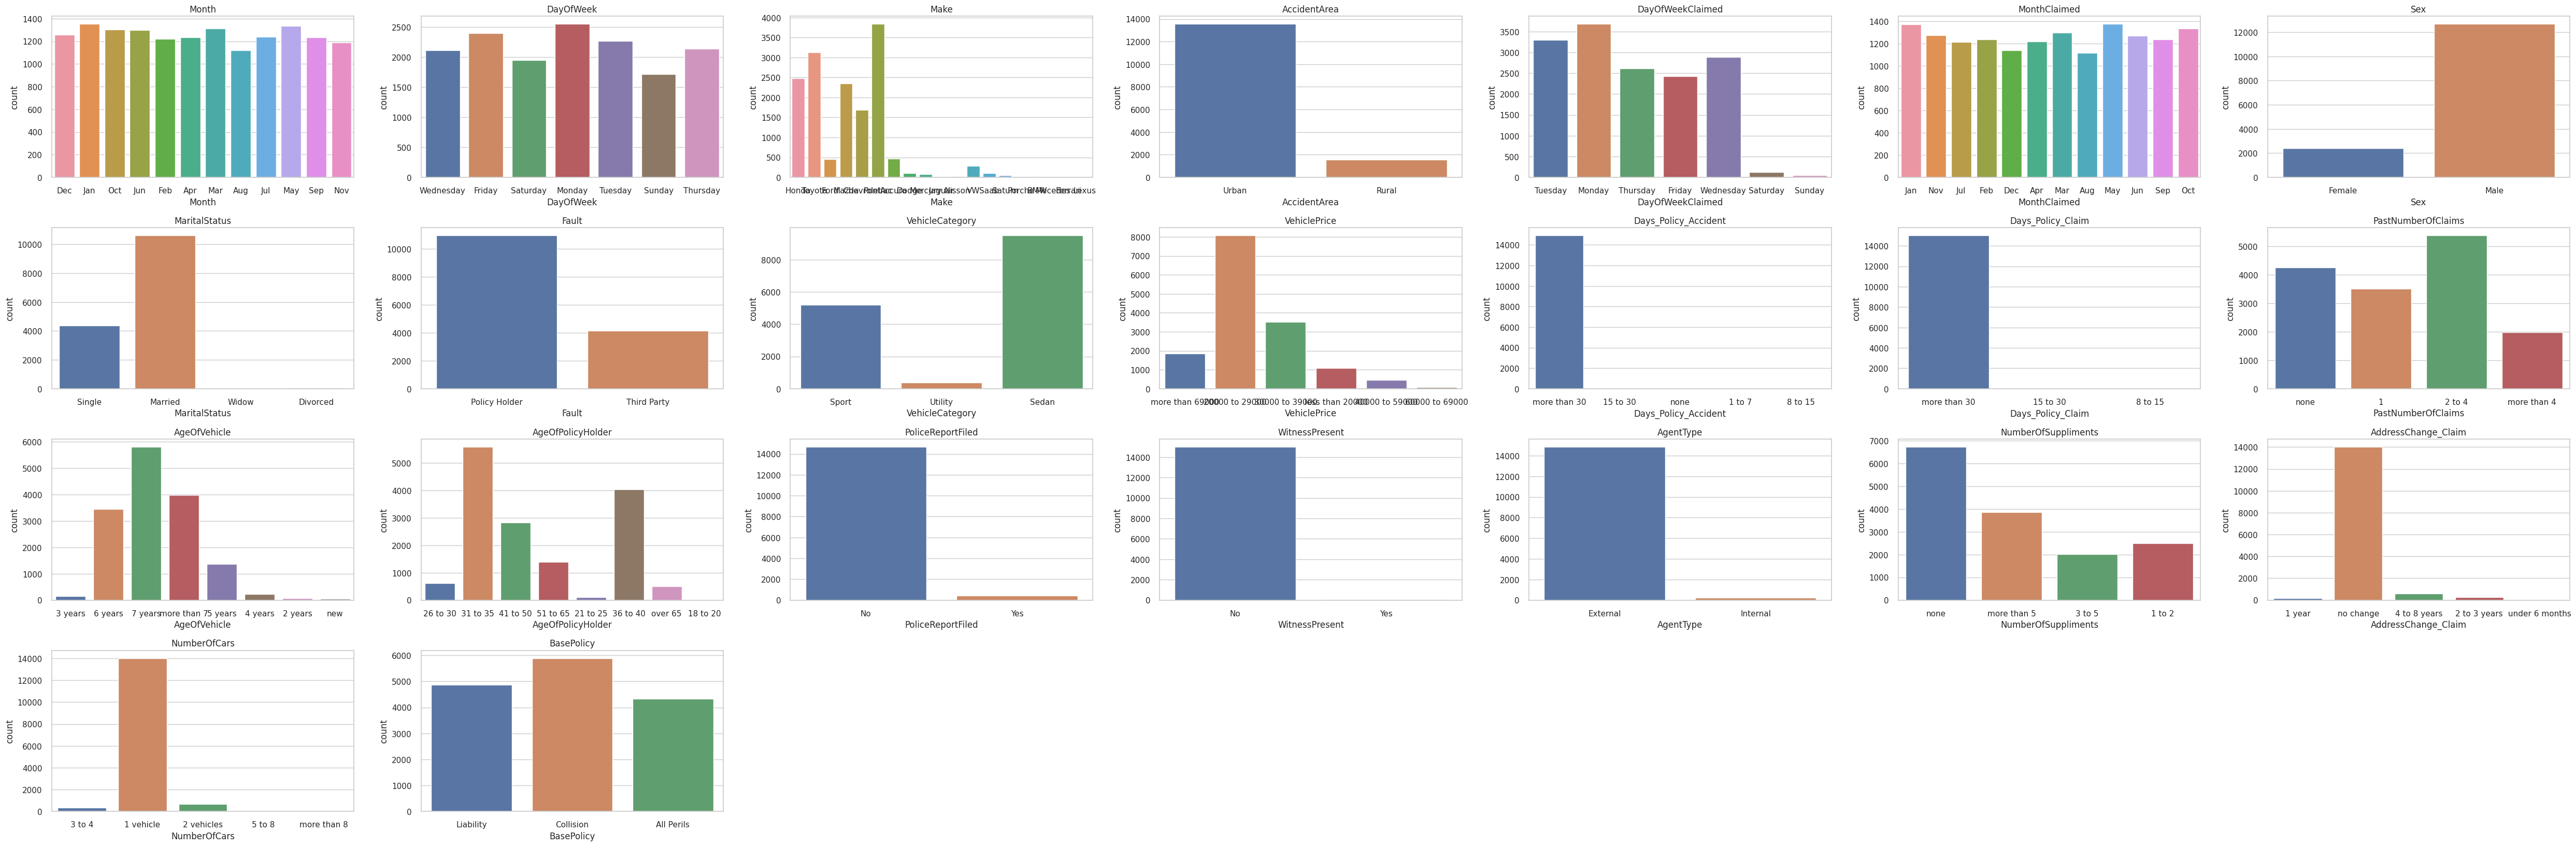

In [193]:
# Analisis de columnas categoricas para detectar anomalias. Si bien hay algunas que tienen una distribución natural, no las voy a alterar ya que entiendo que es
## la naturaleza de dicha distribución y mas adelante se haran las visualizaciones, comparaciones y modelos pertinentes para entenderlo mas en profundidad.

plt.figure(figsize=(50, 20))
sns.set(style='whitegrid')

for i, col in enumerate(variables_categoricas):
    plt.subplot(5, 7, i+1)  # Ajusta el número de subplots según la cantidad de columnas
    sns.countplot(x=variables_categoricas[col])
    plt.title(col)

plt.tight_layout()
plt.show()

##Correlacion Variables

### Numericas contra Target

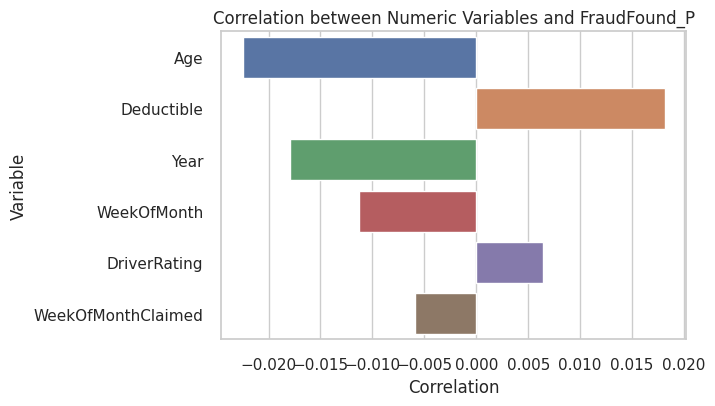

In [194]:
# Calculo de la correlación entre las variables numéricas y FraudFound_P
correlation = df_insurance[variables_numericas.columns].corrwith(df_insurance['FraudFound_P'])

# Crear un DataFrame con los resultados
correlation_df = pd.DataFrame({'Variable': correlation.index, 'Correlation': correlation.values})

# Ordenar los resultados por valor absoluto de la correlación
correlation_df['Abs Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Abs Correlation', ascending=False)

# Visualizar la correlación en un gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x='Correlation', y='Variable', data=correlation_df, orient='h')
plt.title('Correlation between Numeric Variables and FraudFound_P')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.show()

Podemos ver que la correlacion entre las variables numericas y FraudFound_P (Nuestro Target) es baja

### Categoricas con target

In [195]:
## entender dependencia de variables contra FraudFound_P con metodo de chi2

# relizo codificación one-hot
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(variables_categoricas)

# aplico SelectKBest con chi2
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(encoded_categorical, df_insurance['FraudFound_P'])

# obtenemos las puntuaciones y los p-valores
chi2_scores = selector.scores_
chi2_pvalues = selector.pvalues_

# ajustamos el tamaño de las listas a la longitud de las columnas
num_features = len(variables_categoricas.columns)
chi2_scores = chi2_scores[:num_features]
chi2_pvalues = chi2_pvalues[:num_features]

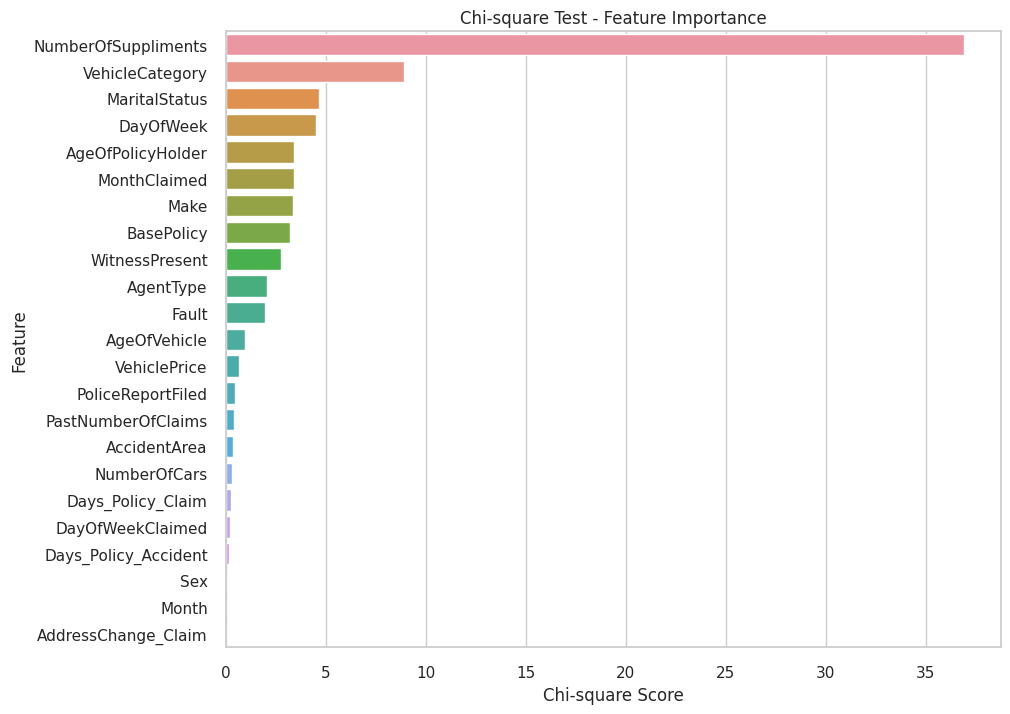

In [196]:
#Debajo podemos ver variables con correlaciones muy fuertes y 
# otras con correlaciones muy bajas respecto a la variable target. 
# Aguardaremos a aplicar el metodo de feature selection mas adelante para limpiar las variables a utilizar
# en el modelo.

results = pd.DataFrame({'Feature': variables_categoricas.columns, 'Score': chi2_scores, 'p-value': chi2_pvalues})
results = results.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=results, orient='h')
plt.title('Chi-square Test - Feature Importance')
plt.xlabel('Chi-square Score')
plt.ylabel('Feature')
plt.show()

### Categoricas entre si

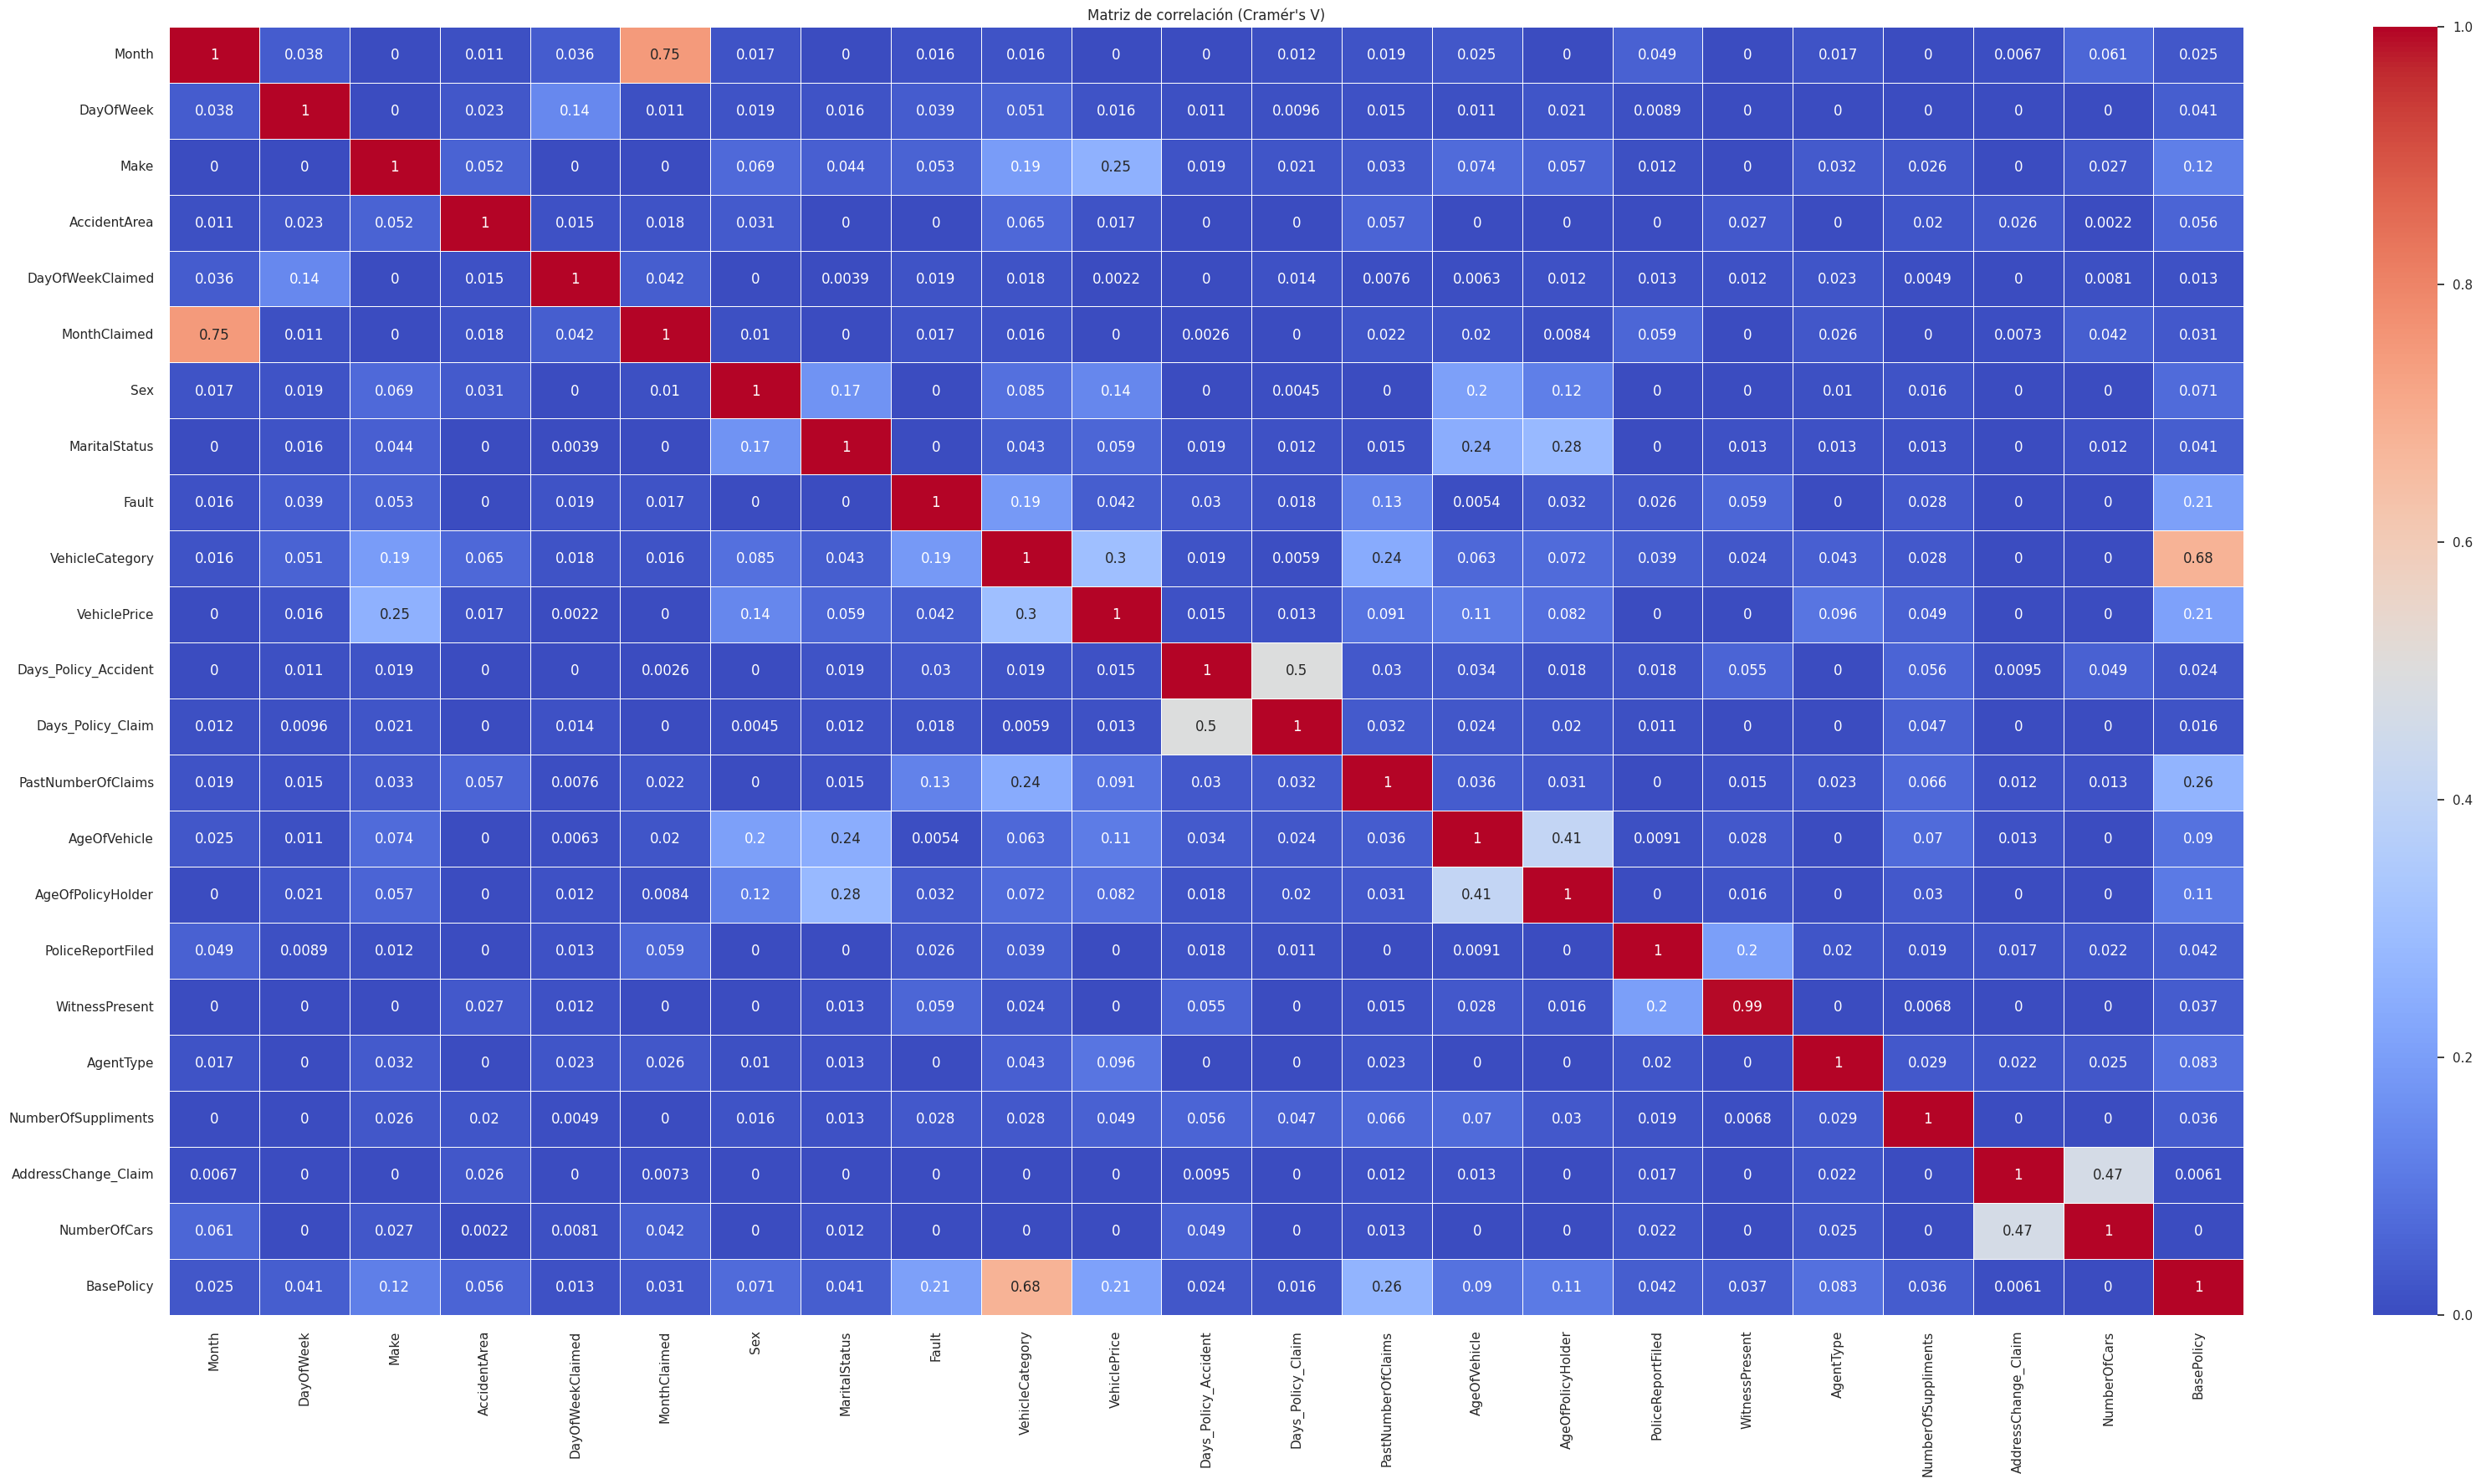

In [197]:
#Función para calcular el coeficiente de Cramér's V
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calcular la matriz de correlación
correlation_matrix = pd.DataFrame(index=variables_categoricas.columns, columns=variables_categoricas.columns)

for col1 in variables_categoricas.columns:
    for col2 in variables_categoricas.columns:
        confusion_matrix = pd.crosstab(variables_categoricas[col1], variables_categoricas[col2])
        c_v = cramers_v(confusion_matrix)
        correlation_matrix.loc[col1, col2] = c_v

# Visualizar la matriz de correlación
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación (Cramér\'s V)')
plt.show()

## Preguntas y Visualizaciones 

### ¿Cuál es la proporcion de casos fraudulentos vs no fraudulentos? 

In [198]:
no_fraude = df_insurance[df_insurance.FraudFound_P == 0]
fraude = df_insurance[df_insurance.FraudFound_P == 1]

In [199]:
porc_fraude = len(fraude) / len(df_insurance)
porc_nofraude = len(no_fraude) / len(df_insurance)

In [200]:
name = ['fraude', 'no_fraude']

size = [porc_fraude, porc_nofraude]

fig = px.pie(values = size, names = name)

fig.show()

Vemos un claro desbalance en la variable, por lo que mas adelante deberemos balancear la misma a fin de tener un modelo mas preciso. 

### ¿Cuál es la relacion entre la edad y la cantidad de accidentes, comparando los fraudulentos con los reales?

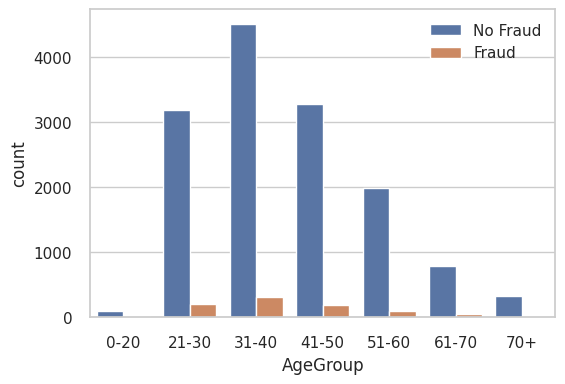

In [201]:
# Defino intervalos de edad
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']

# agrupo la edad en los intervalos definidos
df_insurance['AgeGroup'] = pd.cut(df_insurance['Age'], bins=bins, labels=labels)


plt.figure(figsize=(6, 4))
sns.countplot(x='AgeGroup', hue='FraudFound_P', data=df_insurance)
plt.legend(['No Fraud', 'Fraud'])
plt.show()

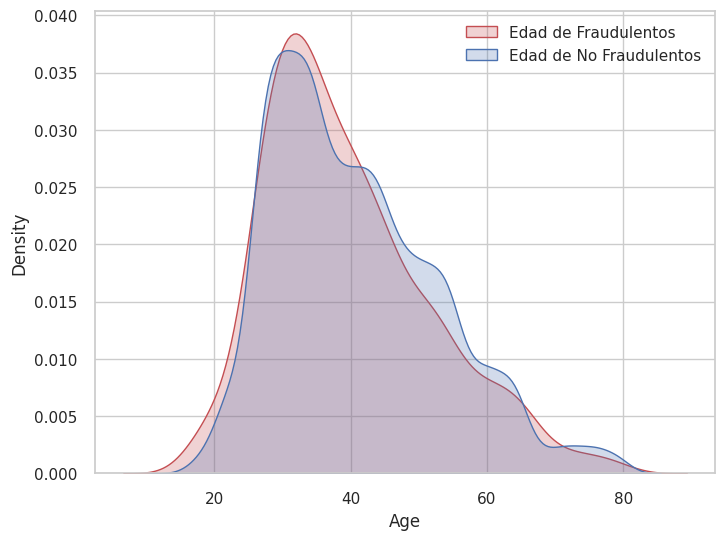

In [202]:
plt.figure(figsize=(8,6))
sns.kdeplot(fraude['Age'], label='Edad de Fraudulentos', color='r', fill=True)
sns.kdeplot(no_fraude['Age'], label='Edad de No Fraudulentos', color='b', fill=True)
plt.legend()

In [203]:
df_insurance = df_insurance.drop(columns='AgeGroup')


Hay una mayor proporcion de accidentes en las edades entre 31 y 40 años.

### ¿Existen patrones estacionales en la presentación de reclamos?

In [204]:
grouped_claims = df_insurance.groupby(['Month']).size().reset_index(name='Count')

In [205]:
meses_ordenados = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_insurance['Month'] = pd.Categorical(df_insurance['Month'], categories=meses_ordenados, ordered=True)
grouped_claims = df_insurance.groupby('Month').size().reset_index(name='Count')
grouped_claims = grouped_claims.sort_values('Month')

In [206]:
grouped_claims

,Month,Count
0,Jan,1352
1,Feb,1219
2,Mar,1313
3,Apr,1235
4,May,1336
5,Jun,1297
6,Jul,1241
7,Aug,1122
8,Sep,1235
9,Oct,1301


In [207]:
mean_claims = np.mean(grouped_claims['Count'])

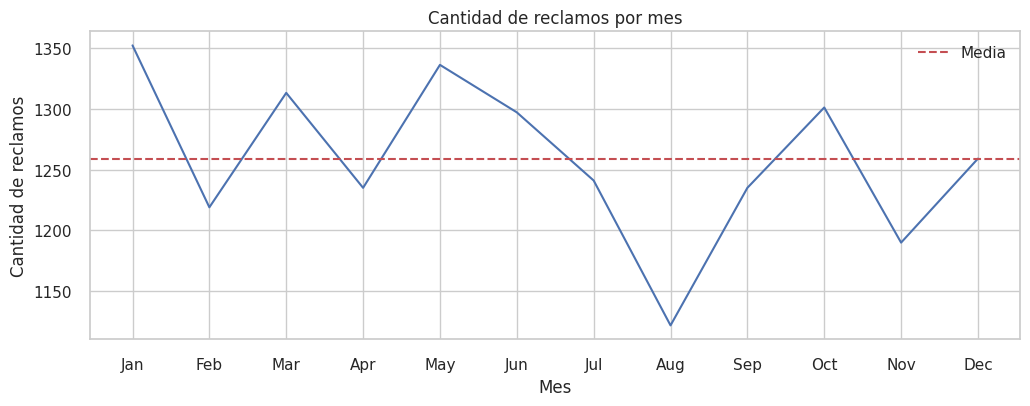

In [208]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x='Month', y='Count', data=grouped_claims, linestyle='solid')
plt.title('Cantidad de reclamos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reclamos')
plt.axhline(y=grouped_claims['Count'].mean(), color='r', linestyle='--', label='Media')
plt.legend()
plt.show()


En el grafico vemos que hay un pico maximo de casos en Enero (mes de invierno), y luego empiezan bajar nuevamente en febrero. Tambien vemos picos a la baja y a la alza el resto del año por lo que no podemos concluir si hay una relacion real con el clima y la cantidad de accidentes

 ### ¿El valor del vehículo asegurado influye en la probabilidad de presentar reclamos fraudulentos? 

In [209]:
df_price_vs_fraud = df_insurance[['VehiclePrice', 'FraudFound_P']]

In [210]:
grouped_price_vs_fraud = df_price_vs_fraud.groupby(['VehiclePrice', 'FraudFound_P']).size().reset_index(name='Count')
grouped_price_vs_fraud["VehiclePrice"] = grouped_price_vs_fraud["VehiclePrice"].astype("category")
grouped_price_vs_fraud["VehiclePrice"] = grouped_price_vs_fraud["VehiclePrice"].cat.reorder_categories(["less than 20000", "20000 to 29000", "30000 to 39000", "40000 to 59000", "60000 to 69000", "more than 69000"])

In [211]:
grouped_price_vs_fraud

,VehiclePrice,FraudFound_P,Count
0,20000 to 29000,0,7658
1,20000 to 29000,1,421
2,30000 to 39000,0,3357
3,30000 to 39000,1,175
4,40000 to 59000,0,430
5,40000 to 59000,1,31
6,60000 to 69000,0,83
7,60000 to 69000,1,4
8,less than 20000,0,992
9,less than 20000,1,103


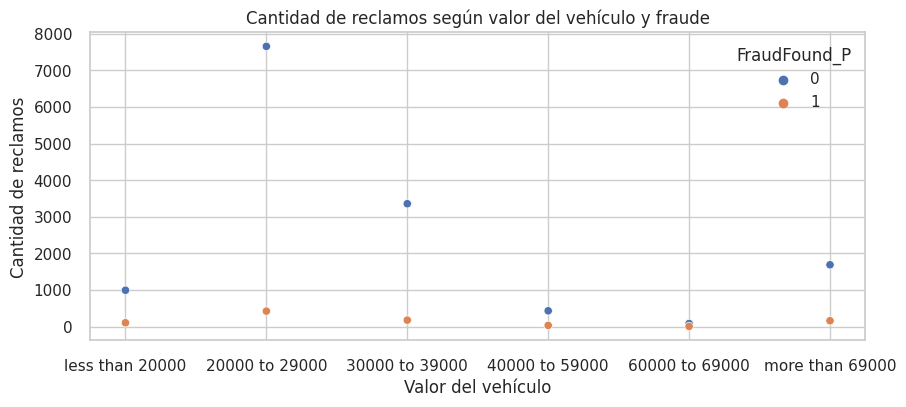

In [212]:
fig, ax = plt.subplots(figsize=(10,4))
sns.scatterplot(x="VehiclePrice", y="Count", hue="FraudFound_P", data=grouped_price_vs_fraud)
plt.title("Cantidad de reclamos según valor del vehículo y fraude")
plt.xlabel("Valor del vehículo")
plt.ylabel("Cantidad de reclamos")
plt.show()

No se ve ninguna tendencia clara ni una fuerte correlacion entre el valor del vehiculo y los fraudes

### ¿Hay alguna relación entre el género y estado marital del asegurado y la probabilidad de presentar reclamos fraudulentos?

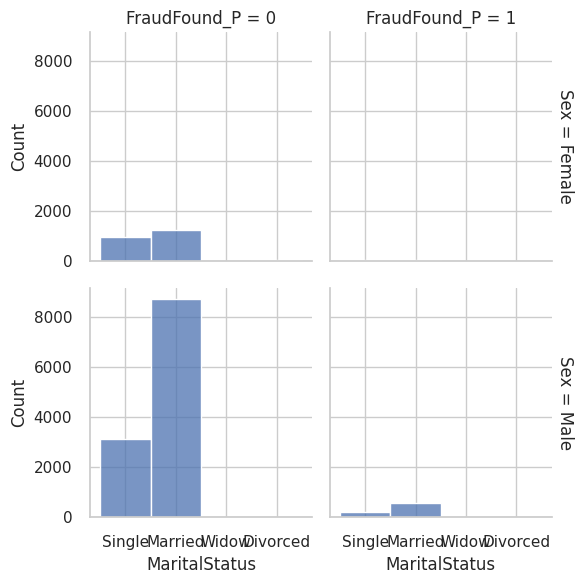

In [213]:
grid = sns.FacetGrid(df_insurance, row='Sex', col='FraudFound_P', margin_titles=True)
grid.map(sns.histplot, 'MaritalStatus', bins=2)

In [214]:
df_fraudes = df_insurance[df_insurance['FraudFound_P']==1]
fraude_por_genero = df_fraudes.groupby('Sex').size()
fraud_por_genero_porcentaje = fraude_por_genero / fraude_por_genero.sum() * 100

fraude_por_estadocivil = df_fraudes.groupby('MaritalStatus').size()
fraud_por_estadocivil_porcentaje = fraude_por_estadocivil / fraude_por_estadocivil.sum() * 100


Text(0.5, 1.0, 'Distribución de reclamos fraudulentos por Genero')

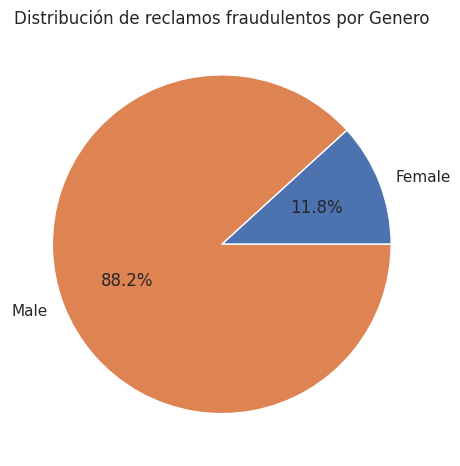

In [215]:
plt.pie(fraud_por_genero_porcentaje, labels=['Female', 'Male'], autopct='%1.1f%%')
plt.title('Distribución de reclamos fraudulentos por Genero')

<Axes: xlabel='count', ylabel='MaritalStatus'>

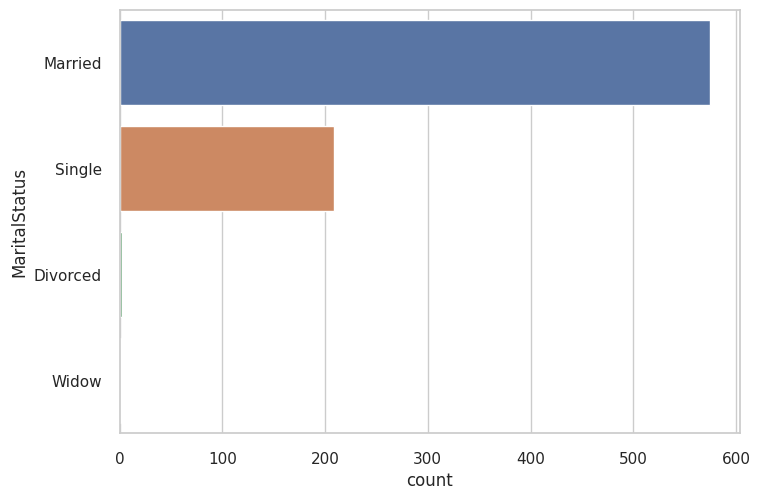

In [216]:
filtrado = df_insurance[(df_insurance['FraudFound_P'] == 1) & (df_insurance['Sex'] == 'Male')]

sns.countplot(y='MaritalStatus', data=filtrado)

<Axes: xlabel='count', ylabel='MaritalStatus'>

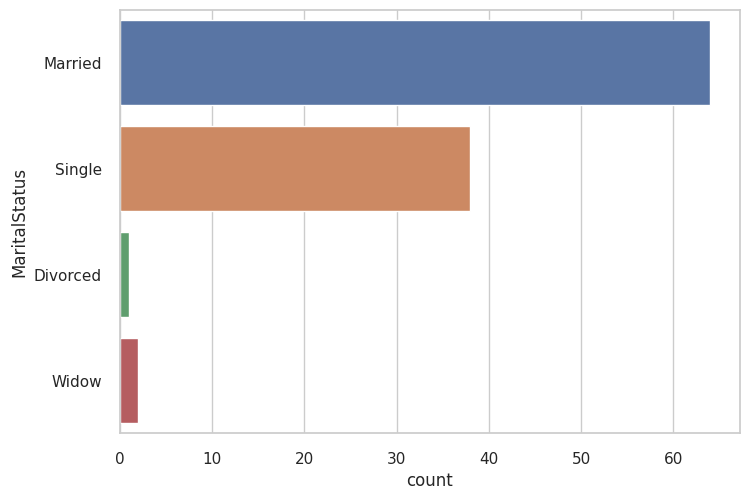

In [217]:
filtrado2 = df_insurance[(df_insurance['FraudFound_P'] == 1) & (df_insurance['Sex'] == 'Female')]

sns.countplot(y='MaritalStatus', data=filtrado2)

La mayoria de los fraudes son ejecutados por hombres y el estado civil de los hombres que cometen fraude en su mayoría es CASADO.

#Encoding

In [218]:
## Por la naturaleza de las informacion en el dataset, deberemos hacer manualmente una categorizacion y encoding de las siguientes columnas ordinales. 

encoding_dict = {
    'Month': {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12},
    'DayOfWeek': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7},
    'MonthClaimed': {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12},
    'DayOfWeekClaimed': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7},
    'PastNumberOfClaims': {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3},
    'NumberOfSuppliments': {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 4},
    'VehiclePrice': {'less than 20000': 0, '20000 to 29000': 1, '30000 to 39000': 2, '40000 to 59000': 3, '60000 to 69000': 4, 'more than 69000': 5},
    'AgeOfVehicle': {'3 years': 3, '6 years': 6, '7 years': 7, 'more than 7': 8, '5 years': 5, 'new': 0, '4 years': 4, '2 years': 2}
}

for column, encoding_map in encoding_dict.items():
    df_insurance[column] = df_insurance[column].replace(encoding_map)

In [219]:
df_insurance.reset_index(drop=True, inplace=True)
df_insurance

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,Honda,Urban,2,1,1,Female,Single,...,3,26 to 30,No,No,External,0,1 year,3 to 4,1994,Liability
1,1,3,3,Honda,Urban,1,1,4,Male,Single,...,6,31 to 35,Yes,No,External,0,no change,1 vehicle,1994,Collision
2,10,5,5,Honda,Urban,4,11,2,Male,Married,...,7,41 to 50,No,No,External,0,no change,1 vehicle,1994,Collision
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,...,8,51 to 65,Yes,No,External,4,no change,1 vehicle,1994,Liability
4,1,5,1,Honda,Urban,2,2,2,Female,Single,...,5,31 to 35,No,No,External,0,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,11,4,5,Toyota,Urban,2,11,5,Male,Married,...,6,31 to 35,No,No,External,0,no change,1 vehicle,1996,Collision
15096,11,5,4,Pontiac,Urban,5,12,1,Male,Married,...,6,31 to 35,No,No,External,4,no change,3 to 4,1996,Liability
15097,11,5,4,Toyota,Rural,5,12,1,Male,Single,...,5,26 to 30,No,No,External,1,no change,1 vehicle,1996,Collision
15098,12,1,1,Toyota,Urban,4,12,2,Female,Married,...,2,31 to 35,No,No,External,4,no change,1 vehicle,1996,All Perils


In [220]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoder a las columnas seleccionadas en df_insurance
columns_to_encode = ['Make', 'MaritalStatus','VehicleCategory','AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'BasePolicy', 'AgeOfPolicyHolder']
for column in columns_to_encode:
    df_insurance[column] = label_encoder.fit_transform(df_insurance[column])

In [221]:
df_insurance.reset_index(drop=True, inplace=True)
df_insurance

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,6,1,2,1,1,0,2,...,3,2,0,0,0,0,1 year,3 to 4,1994,2
1,1,3,3,6,1,1,1,4,1,2,...,6,3,1,0,0,0,no change,1 vehicle,1994,1
2,10,5,5,6,1,4,11,2,1,1,...,7,5,0,0,0,0,no change,1 vehicle,1994,1
3,6,2,6,17,0,5,7,1,1,1,...,8,6,1,0,0,4,no change,1 vehicle,1994,2
4,1,5,1,6,1,2,2,2,0,2,...,5,3,0,0,0,0,no change,1 vehicle,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,11,4,5,17,1,2,11,5,1,1,...,6,3,0,0,0,0,no change,1 vehicle,1996,1
15096,11,5,4,13,1,5,12,1,1,1,...,6,3,0,0,0,4,no change,3 to 4,1996,2
15097,11,5,4,17,0,5,12,1,1,2,...,5,2,0,0,0,1,no change,1 vehicle,1996,1
15098,12,1,1,17,1,4,12,2,0,1,...,2,3,0,0,0,4,no change,1 vehicle,1996,0


In [222]:
OHE = OneHotEncoder()

columns_to_OHE = ['Deductible', 'Days_Policy_Accident', 'Days_Policy_Claim', 'AddressChange_Claim', 'NumberOfCars']

encoded_values = OHE.fit_transform(df_insurance[columns_to_OHE])

encoded_columns = [f'{column}_{value}' for column, categories in zip(columns_to_OHE, OHE.categories_) for value in categories]

encoded_df = pd.DataFrame(encoded_values.toarray(), columns=encoded_columns)

df_insurance = pd.concat([df_insurance, encoded_df], axis=1)

df_insurance.drop(columns=columns_to_OHE, inplace=True)

In [223]:
df_insurance.reset_index(drop=True, inplace=True)

In [224]:
df_insurance

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
0,12,5,3,6,1,2,1,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,3,3,6,1,1,1,4,1,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10,5,5,6,1,4,11,2,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6,2,6,17,0,5,7,1,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,5,1,6,1,2,2,2,0,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,11,4,5,17,1,2,11,5,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
15096,11,5,4,13,1,5,12,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15097,11,5,4,17,0,5,12,1,1,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
15098,12,1,1,17,1,4,12,2,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [225]:
df_numeric= df_insurance['Age']
df_numeric

0        21
1        34
2        47
3        65
4        27
         ..
15095    35
15096    30
15097    24
15098    34
15099    21
Name: Age, Length: 15100, dtype: int64

In [226]:
df_insurance_encoded = df_insurance.drop(columns='Age')
df_insurance_encoded.reset_index(drop=True, inplace=True)
df_insurance_encoded

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
0,12,5,3,6,1,2,1,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,3,3,6,1,1,1,4,1,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10,5,5,6,1,4,11,2,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6,2,6,17,0,5,7,1,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,5,1,6,1,2,2,2,0,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,11,4,5,17,1,2,11,5,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
15096,11,5,4,13,1,5,12,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15097,11,5,4,17,0,5,12,1,1,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
15098,12,1,1,17,1,4,12,2,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#Feature Selection

Utilizaremos el metodo de Forward Selection

In [227]:
df_insurance_X = pd.concat([df_insurance_encoded, df_numeric], axis=1)
df_insurance_X.reset_index(drop=True, inplace=True)
df_insurance_X

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,Age
0,12,5,3,6,1,2,1,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
1,1,3,3,6,1,1,1,4,1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,34
2,10,5,5,6,1,4,11,2,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,47
3,6,2,6,17,0,5,7,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,65
4,1,5,1,6,1,2,2,2,0,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,11,4,5,17,1,2,11,5,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,35
15096,11,5,4,13,1,5,12,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,30
15097,11,5,4,17,0,5,12,1,1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24
15098,12,1,1,17,1,4,12,2,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,34


In [228]:
x =df_insurance_X.drop(columns=['FraudFound_P'])

In [229]:
y=df_insurance['FraudFound_P']
y

0        0
1        0
2        0
3        0
4        0
        ..
15095    1
15096    0
15097    1
15098    0
15099    1
Name: FraudFound_P, Length: 15100, dtype: int64

In [230]:
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(max_iter=15100),
          k_features=24,  #hacemos la mitad de las variables 
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 0)

In [231]:
sfs.fit(x, y)
sfs.k_feature_names_     #Lista de variables

('Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'VehicleCategory',
 'VehiclePrice',
 'DriverRating',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'Year',
 'BasePolicy',
 'Deductible_300')

In [232]:
names = ('Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'VehicleCategory',
 'VehiclePrice',
 'DriverRating',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'Year',
 'BasePolicy',
 'Deductible_300')

In [233]:
X = sfs.transform(x)
X = pd.DataFrame(X, columns= names)
X

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,Year,BasePolicy,Deductible_300
0,12.0,5.0,3.0,6.0,1.0,2.0,1.0,1.0,0.0,2.0,...,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1994.0,2.0,1.0
1,1.0,3.0,3.0,6.0,1.0,1.0,1.0,4.0,1.0,2.0,...,0.0,6.0,3.0,1.0,0.0,0.0,0.0,1994.0,1.0,0.0
2,10.0,5.0,5.0,6.0,1.0,4.0,11.0,2.0,1.0,1.0,...,1.0,7.0,5.0,0.0,0.0,0.0,0.0,1994.0,1.0,0.0
3,6.0,2.0,6.0,17.0,0.0,5.0,7.0,1.0,1.0,1.0,...,1.0,8.0,6.0,1.0,0.0,0.0,4.0,1994.0,2.0,0.0
4,1.0,5.0,1.0,6.0,1.0,2.0,2.0,2.0,0.0,2.0,...,0.0,5.0,3.0,0.0,0.0,0.0,0.0,1994.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,11.0,4.0,5.0,17.0,1.0,2.0,11.0,5.0,1.0,1.0,...,2.0,6.0,3.0,0.0,0.0,0.0,0.0,1996.0,1.0,0.0
15096,11.0,5.0,4.0,13.0,1.0,5.0,12.0,1.0,1.0,1.0,...,3.0,6.0,3.0,0.0,0.0,0.0,4.0,1996.0,2.0,0.0
15097,11.0,5.0,4.0,17.0,0.0,5.0,12.0,1.0,1.0,2.0,...,3.0,5.0,2.0,0.0,0.0,0.0,1.0,1996.0,1.0,0.0
15098,12.0,1.0,1.0,17.0,1.0,4.0,12.0,2.0,0.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,4.0,1996.0,0.0,0.0


# Balanceo de Variable Target

Como en las visualizaciones pudimos detectar un desbalance en la variable FraudFound_P, procedemos con el metodo SMOTE de balanceo

In [234]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Modelo

Tenemos un problema de clasificacion binaria, y contamos con la variable target a predecir. Por lo que procederemos a probar con los siguientes modelos supervisados. 

## Logistic Regresion

In [235]:
from sklearn.metrics import classification_report
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
logreg = LogisticRegression(max_iter=15100)

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test)

In [236]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


In [237]:
#METRICAS>
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión: 0.7066706372840976
Recall: 0.8447846208615165
F1-score: 0.7695800227014755


Text(61.388888888888886, 0.5, 'Actual')

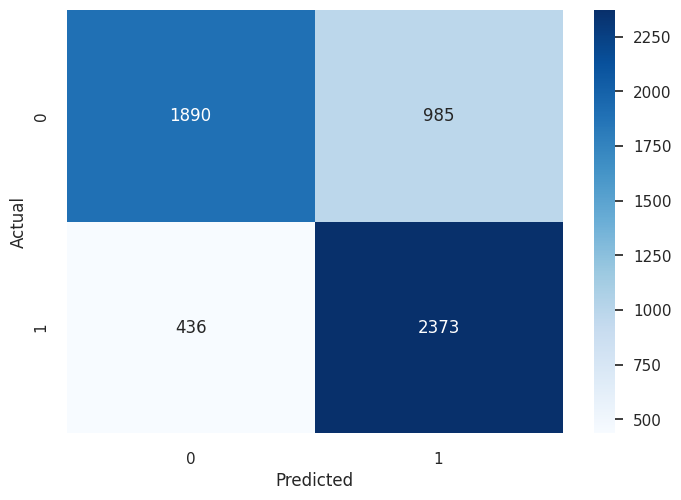

In [238]:
# Calcular la matriz de confusión
confusion = cm(y_test, y_pred)
sns.heatmap(confusion, annot=True, cmap="Blues",fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

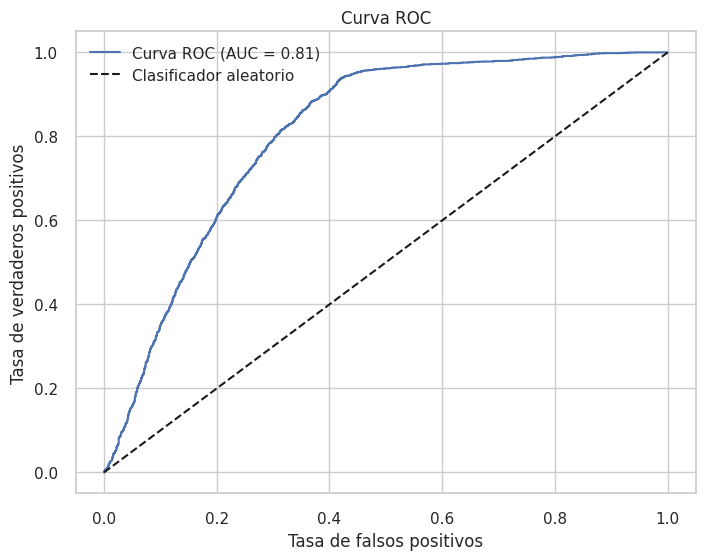

In [239]:
# Calcular las probabilidades de las clases positivas
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos, la tasa de falsos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

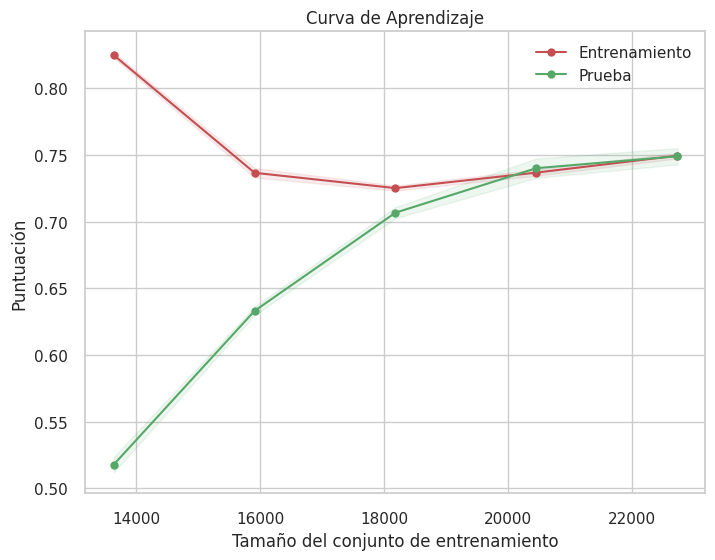

In [240]:
# Revisar Overfitting: vemos debajo que a medida que la muestra aumenta, el test y el train convergen.
# esto indicaria que no hay overfitting.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Puntuación')
    plt.grid(True)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Prueba')
    plt.legend(loc='best')
    
    plt.show()

# Llamada a la función para visualizar la curva de aprendizaje
plot_learning_curve(logreg, X_resampled, y_resampled, cv=5)

In [241]:
## Revisamos underfitting: #Dado el resultado de variacion de sesgo bajo, concluimos que no hay underfitting. 

#precisión en los datos de entrenamiento
y_train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

#precisión en los datos de prueba
y_test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

#variación del sesgo
bias_variation = abs(train_accuracy - test_accuracy)

print("Variación del sesgo:", bias_variation)

Variación del sesgo: 0.0003079359493225464


## Random Tree Classifier

In [242]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test)

In [243]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.971850809289233


In [244]:
#METRICAS>
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión: 0.9992461364493027
Recall: 0.9437522249911
F1-score: 0.9707067008421824


Text(61.388888888888886, 0.5, 'Actual')

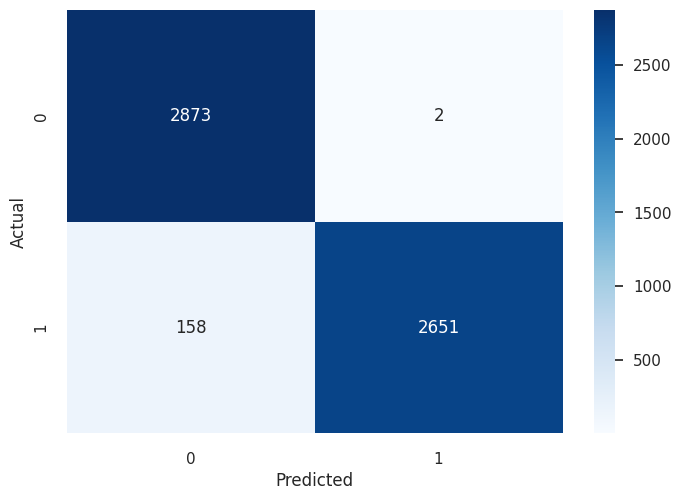

In [245]:
# Calcular la matriz de confusión
confusion = cm(y_test, y_pred)
sns.heatmap(confusion, annot=True, cmap="Blues",fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

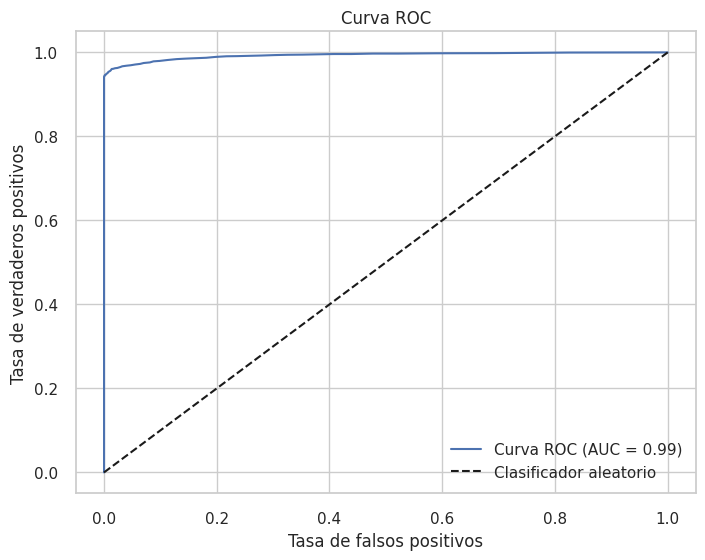

In [246]:
# Calcular las probabilidades de las clases positivas
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos, la tasa de falsos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

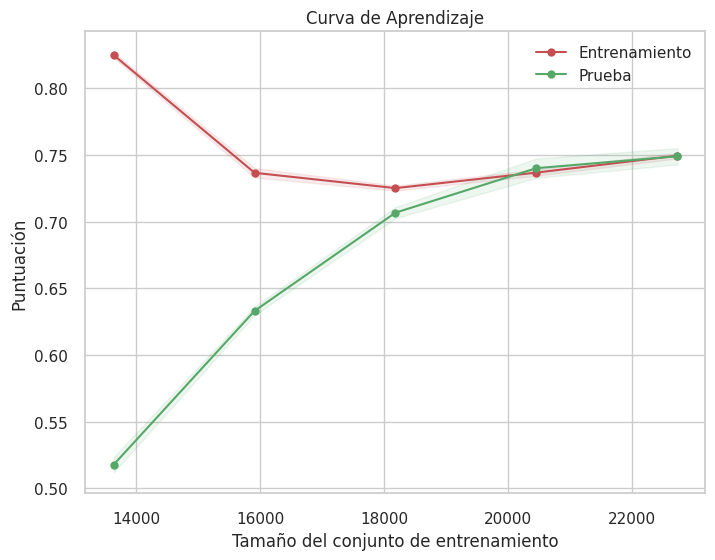

In [247]:
# Revisar Overfitting: vemos debajo que a medida que la muestra aumenta, el test y el train convergen.
# esto indicaria que no hay overfitting.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Puntuación')
    plt.grid(True)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Prueba')
    plt.legend(loc='best')
    
    plt.show()

# Llamada a la función para visualizar la curva de aprendizaje
plot_learning_curve(logreg, X_resampled, y_resampled, cv=5)

In [248]:
## Revisamos underfitting: #Dado el resultado de variacion de sesgo bajo, concluimos que no hay underfitting. 

#precisión en los datos de entrenamiento
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

#precisión en los datos de prueba
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

#variación del sesgo
bias_variation = abs(train_accuracy - test_accuracy)

print("Variación del sesgo:", bias_variation)

Variación del sesgo: 0.028149190710767047


## Decision Tree Classifier

In [249]:
from sklearn.tree import DecisionTreeClassifier

In [250]:
#Crear el clasificador de árbol de decisión
dtc = DecisionTreeClassifier()

# Entrenar el clasificador utilizando el conjunto de entrenamiento
dtc.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = dtc.predict(X_test)

In [251]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9393033075299085


In [252]:
#METRICAS>
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión: 0.9322807017543859
Recall: 0.9458882164471342
F1-score: 0.9390351652235377


Text(61.388888888888886, 0.5, 'Actual')

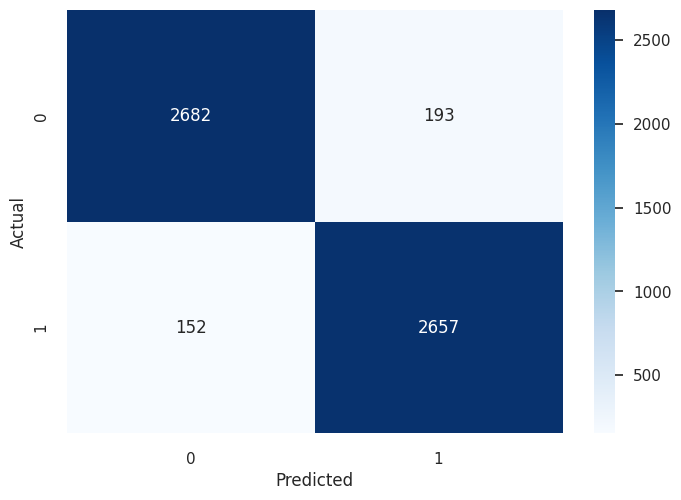

In [253]:
# Calcular la matriz de confusión
confusion = cm(y_test, y_pred)
sns.heatmap(confusion, annot=True, cmap="Blues",fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

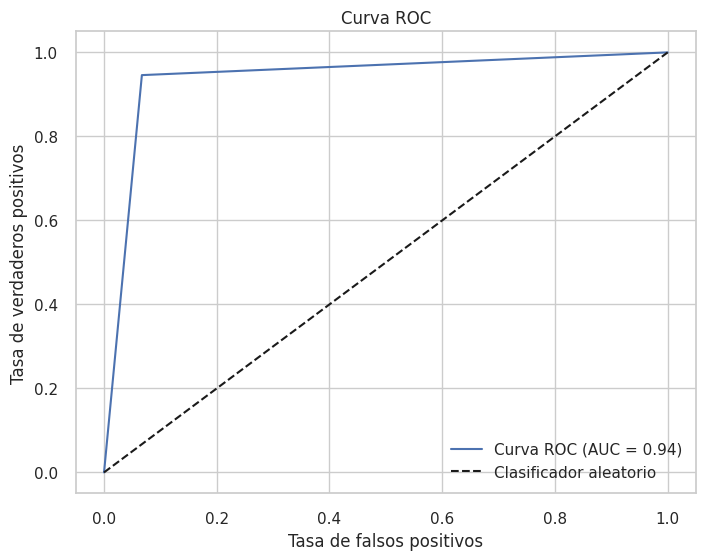

In [254]:
# Calcular las probabilidades de las clases positivas
y_pred_proba = dtc.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos, la tasa de falsos positivos y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

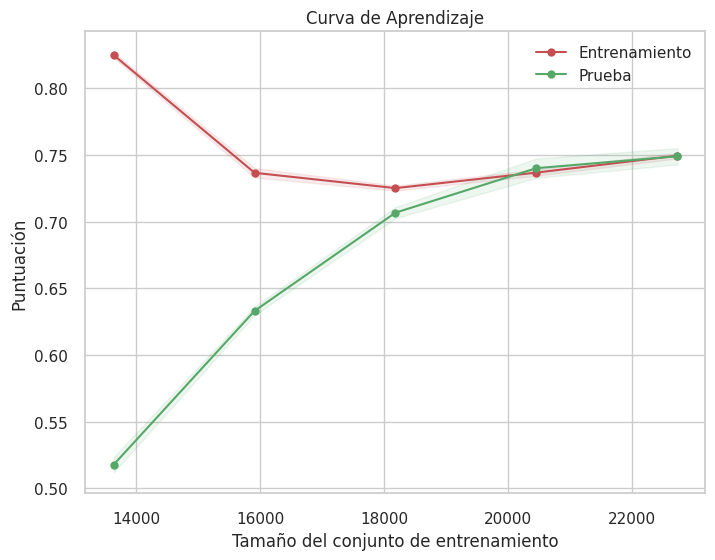

In [255]:
# Revisar Overfitting: vemos debajo que a medida que la muestra aumenta, el test y el train convergen.
# esto indicaria que no hay overfitting.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Puntuación')
    plt.grid(True)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Prueba')
    plt.legend(loc='best')
    
    plt.show()

# Llamada a la función para visualizar la curva de aprendizaje
plot_learning_curve(logreg, X_resampled, y_resampled, cv=5)

In [256]:
## Revisamos underfitting: #Dado el resultado de variacion de sesgo bajo, concluimos que no hay underfitting. 

#precisión en los datos de entrenamiento
y_train_pred = dtc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

#precisión en los datos de prueba
y_test_pred = dtc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

#variación del sesgo
bias_variation = abs(train_accuracy - test_accuracy)

print("Variación del sesgo:", bias_variation)

Variación del sesgo: 0.06069669247009146


## Conclusion

Luego de ejecutar los 3 modelos y comprobar que ninguno tiene over ni under fitting, se concluye que el modelo con mejores resultados es el Random Tree Classifier. Debajo se grafica la comparativa entre resultados. 
El segundo mejor es el modelo de Decision Tree Classifier, y por ultimo el de Regresion Logistica.

<ipython-input-257-f76041fb233f>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



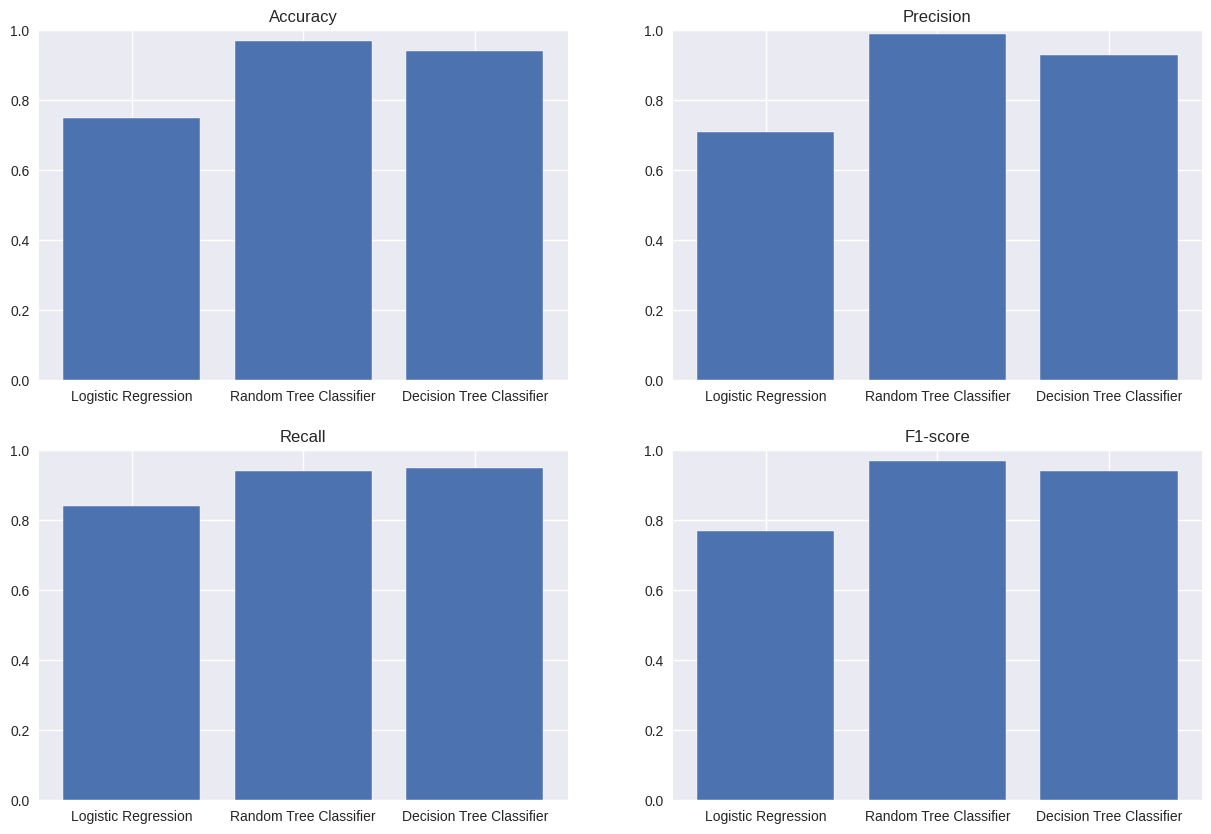

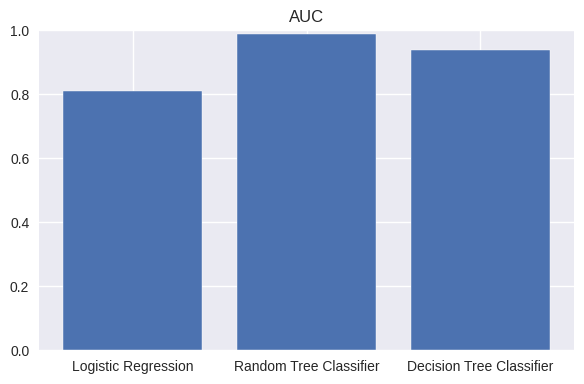

In [257]:
# Comparativa
plt.style.use('seaborn')
# Resultados de los modelos
model_names = ['Logistic Regression', 'Random Tree Classifier', 'Decision Tree Classifier']
accuracy = [0.75, 0.97, 0.94]
precision = [0.71, 0.99, 0.93]
recall = [0.84, 0.94, 0.95]
f1 = [0.77, 0.97, 0.94]
auc = [0.81, 0.99, 0.94]

# Crear el gráfico
plt.figure(figsize=(15, 10))

# Gráfico de barras para Accuracy
plt.subplot(2, 2, 1)
plt.bar(model_names, accuracy)
plt.title('Accuracy')
plt.ylim([0, 1])

# Gráfico de barras para Precision
plt.subplot(2, 2, 2)
plt.bar(model_names, precision)
plt.title('Precision')
plt.ylim([0, 1])

# Gráfico de barras para Recall
plt.subplot(2, 2, 3)
plt.bar(model_names, recall)
plt.title('Recall')
plt.ylim([0, 1])

# Gráfico de barras para F1-score
plt.subplot(2, 2, 4)
plt.bar(model_names, f1)
plt.title('F1-score')
plt.ylim([0, 1])

# Añadir el gráfico de AUC
plt.figure(figsize=(6, 4))
plt.bar(model_names, auc)
plt.title('AUC')
plt.ylim([0, 1])

# Mostrar los gráficos
plt.tight_layout()
plt.show()